<a href="https://colab.research.google.com/github/paulo-sergio-gm/Kmeans-Analysis-Covid-19-Performance/blob/main/Kmeans_Analysis_Covid_Performance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clustering Analysis with Kmeans to evaluate COVID-19 pandemic performance in 112 countries

## Brief Exploratory Analysis and Data Set Up

In [1]:
import pandas as pd
pd.set_option("display.max_rows", None)
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 6]
plt.style.use('fivethirtyeight')
import seaborn as sns
sns.set()

In [2]:
df = pd.read_csv("owid-covid-data_20220426.csv")

In [3]:
df.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

In [4]:
df.shape

(181691, 67)

We can see missing values in most of the variables. But, Let's keep in mind that not all the countries reported their figures at the same time.

In [5]:
display(df.isnull().sum().sort_values())

,0
iso_code,0
location,0
date,0
population,1126
total_cases,6770
new_cases,6998
total_cases_per_million,7579
new_cases_per_million,7807
new_cases_smoothed,8167
new_cases_smoothed_per_million,8971


We have information from January 01, 2020 to April 25, 2022 for 243 different iso_code but, not all of them are countries.

In [6]:
df['date']= pd.to_datetime(df['date'])

In [7]:
df.date.min()

Timestamp('2020-01-01 00:00:00')

In [8]:
df.date.max()

Timestamp('2022-04-25 00:00:00')

In [9]:
len(df['iso_code'].unique())

243

In [10]:
countries = df[~df.iso_code.str.startswith(('OWID'))]

There are some variables defined by the OWID organization. If we remove them, there is information about 228 countries.

In [11]:
len(countries['iso_code'].unique())

228

In [12]:
countries.loc[:, ['iso_code','location']].drop_duplicates().values

array([['AFG', 'Afghanistan'],
       ['ALB', 'Albania'],
       ['DZA', 'Algeria'],
       ['AND', 'Andorra'],
       ['AGO', 'Angola'],
       ['AIA', 'Anguilla'],
       ['ATG', 'Antigua and Barbuda'],
       ['ARG', 'Argentina'],
       ['ARM', 'Armenia'],
       ['ABW', 'Aruba'],
       ['AUS', 'Australia'],
       ['AUT', 'Austria'],
       ['AZE', 'Azerbaijan'],
       ['BHS', 'Bahamas'],
       ['BHR', 'Bahrain'],
       ['BGD', 'Bangladesh'],
       ['BRB', 'Barbados'],
       ['BLR', 'Belarus'],
       ['BEL', 'Belgium'],
       ['BLZ', 'Belize'],
       ['BEN', 'Benin'],
       ['BMU', 'Bermuda'],
       ['BTN', 'Bhutan'],
       ['BOL', 'Bolivia'],
       ['BES', 'Bonaire Sint Eustatius and Saba'],
       ['BIH', 'Bosnia and Herzegovina'],
       ['BWA', 'Botswana'],
       ['BRA', 'Brazil'],
       ['VGB', 'British Virgin Islands'],
       ['BRN', 'Brunei'],
       ['BGR', 'Bulgaria'],
       ['BFA', 'Burkina Faso'],
       ['BDI', 'Burundi'],
       ['KHM', 'Cambodia'],
 

For the purposes of this exercise, we will keep some of the variables with the most complete information and that can provide information about the performance of the countries in relation to COVID-19. Feel free to choose other variables.

In [13]:
countriesDf = countries.dropna(subset=['total_cases_per_million','total_deaths_per_million','total_tests_per_thousand','people_vaccinated_per_hundred',
                                       'stringency_index','median_age','gdp_per_capita','cardiovasc_death_rate',
                                       'diabetes_prevalence', 'female_smokers','male_smokers','life_expectancy'])

In [14]:
cntrs = countriesDf.sort_values('date').drop_duplicates('iso_code',keep='last')

In [15]:
cntrs.shape

(112, 67)

In [16]:
ctrsDF=cntrs[['location','total_cases_per_million','total_deaths_per_million','total_tests_per_thousand','people_vaccinated_per_hundred',
                                       'stringency_index','median_age','gdp_per_capita','cardiovasc_death_rate',
                                       'diabetes_prevalence', 'female_smokers','male_smokers','life_expectancy']]

This is the dataset that we will analyze with K means.

In [17]:
ctrsDF.shape

(112, 13)

## Clustering Analysis

In [18]:
ctrsDF = ctrsDF.set_index('location')

In [19]:
ctrsDF.shape

(112, 12)

First, the elbow method helps us find the optimal number of clusters.

In [20]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

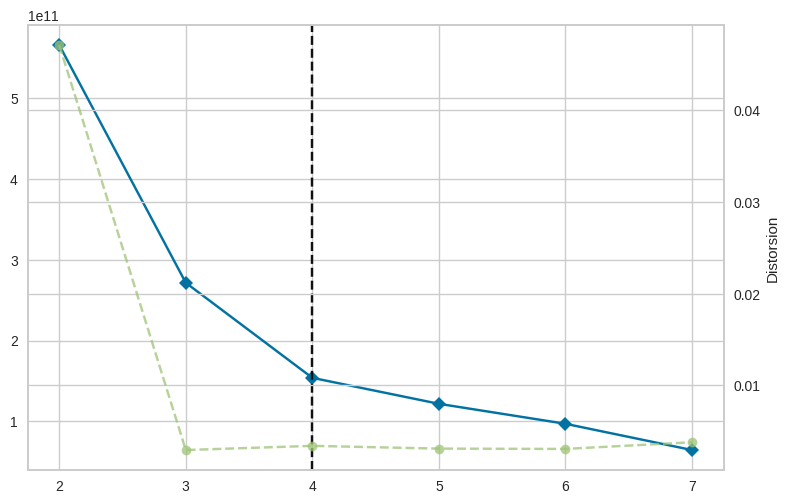

In [21]:
visualizer = KElbowVisualizer(KMeans(), k = (2,8), timings=True)
visualizer.fit(ctrsDF)
plt.xlabel('Number of groups')
plt.ylabel('Distorsion')
plt.show()

In [22]:
from sklearn.preprocessing import scale
ctrs_scaled = scale(ctrsDF)

In [23]:
ctrs_scaled.shape

(112, 12)

This method suggested 4 clusters, so we used this value in the K means algorithm to obtain 4 clusters with the following distribution.

In [24]:
### KMeans
kmeans = KMeans(n_clusters=4, random_state=123)
kmeans = kmeans.fit(ctrs_scaled)
y_hat = kmeans.predict(ctrs_scaled)
C = kmeans.cluster_centers_

In [25]:
import numpy as np

In [26]:
### Frequencies by cluster
(unique, counts) = np.unique(y_hat, return_counts=True)
frequencies = np.asarray((unique, counts)).T

print(frequencies)

[[ 0 37]
 [ 1 22]
 [ 2 16]
 [ 3 37]]


In [27]:
C

array([[ 0.77229825,  0.04915545,  0.58981938,  0.83756768, -0.33037544,
         0.68860366,  1.01085722, -0.92458746,  0.15965603,  0.40974337,
        -0.36468339,  0.94414132],
       [-0.9348993 , -0.84064017, -0.48790569, -1.45599547, -0.13098304,
        -1.44220761, -0.92083529,  0.15734816, -0.90937044, -0.83174688,
        -0.72362883, -1.58329899],
       [ 0.9600286 ,  1.69282188,  0.24104378, -0.00509922, -0.56963   ,
         1.03849333,  0.05411604,  0.53267455, -0.21427495,  1.46899667,
         0.77094625,  0.41870507],
       [-0.63155969, -0.28134644, -0.40394844,  0.03036443,  0.65458374,
        -0.28015301, -0.48673507,  0.60068334,  0.47371016, -0.55043297,
         0.46156702, -0.18378195]])

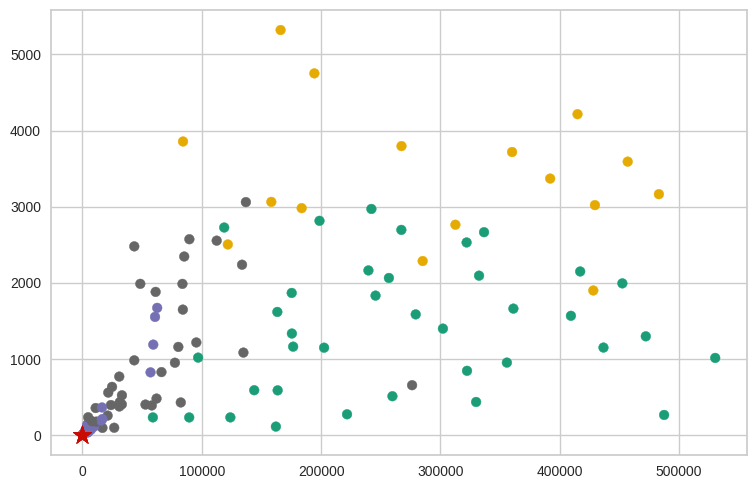

In [28]:
fig, ax = plt.subplots()
ax.scatter(ctrsDF.loc[:,'total_cases_per_million'], ctrsDF.loc[:,'total_deaths_per_million'], c=y_hat, cmap='Dark2')
ax.scatter(C[:,0], C[:,1], s=200, marker='*', c='r')

In [29]:
ctrsDF['kmc'] = y_hat

In [33]:
ctrsDF.head()

,total_cases_per_million,total_deaths_per_million,total_tests_per_thousand,people_vaccinated_per_hundred,stringency_index,median_age,gdp_per_capita,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,life_expectancy,kmc,KMCluster
location,,,,,,,,,,,,,,
Kazakhstan,23835.799,392.999,629.908,12.03,62.96,30.6,24055.588,466.792,7.11,7.0,43.1,73.60,3,Cluster4
Lebanon,80344.640,1157.014,698.962,11.74,65.74,31.1,13367.565,266.591,12.71,26.9,40.7,78.93,3,Cluster4
Botswana,57048.105,823.030,662.807,10.28,62.96,25.8,15807.374,237.372,4.81,5.7,34.4,69.59,1,Cluster2
Romania,61323.452,1880.198,635.794,28.33,50.00,43.0,23313.199,370.946,9.74,22.9,37.1,76.05,3,Cluster4
Belarus,62082.204,478.139,993.073,29.23,19.44,40.3,17167.967,443.129,5.18,10.5,46.1,74.79,3,Cluster4


In [34]:
ctrsDF[ctrsDF['kmc']==3].head()

,total_cases_per_million,total_deaths_per_million,total_tests_per_thousand,people_vaccinated_per_hundred,stringency_index,median_age,gdp_per_capita,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,life_expectancy,kmc,KMCluster
location,,,,,,,,,,,,,,
Kazakhstan,23835.799,392.999,629.908,12.03,62.96,30.6,24055.588,466.792,7.11,7.0,43.1,73.60,3,Cluster4
Lebanon,80344.640,1157.014,698.962,11.74,65.74,31.1,13367.565,266.591,12.71,26.9,40.7,78.93,3,Cluster4
Romania,61323.452,1880.198,635.794,28.33,50.00,43.0,23313.199,370.946,9.74,22.9,37.1,76.05,3,Cluster4
Belarus,62082.204,478.139,993.073,29.23,19.44,40.3,17167.967,443.129,5.18,10.5,46.1,74.79,3,Cluster4
Fiji,66214.494,826.228,539.550,73.54,85.19,28.6,8702.975,412.820,14.49,10.2,34.8,67.44,3,Cluster4


In [32]:
# create a list of our conditions
conditions = [
    (ctrsDF['kmc'] == 0),
    (ctrsDF['kmc'] == 1),
    (ctrsDF['kmc'] == 2),
    (ctrsDF['kmc'] == 3)
    ]

# create a list of the values we want to assign for each condition
values = ['Cluster1', 'Cluster2', 'Cluster3', 'Cluster4']

# create a new column and use np.select to assign values to it using our lists as arguments
ctrsDF['KMCluster'] = np.select(conditions, values)

# display updated DataFrame
ctrsDF.head()

,total_cases_per_million,total_deaths_per_million,total_tests_per_thousand,people_vaccinated_per_hundred,stringency_index,median_age,gdp_per_capita,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,life_expectancy,kmc,KMCluster
location,,,,,,,,,,,,,,
Kazakhstan,23835.799,392.999,629.908,12.03,62.96,30.6,24055.588,466.792,7.11,7.0,43.1,73.60,3,Cluster4
Lebanon,80344.640,1157.014,698.962,11.74,65.74,31.1,13367.565,266.591,12.71,26.9,40.7,78.93,3,Cluster4
Botswana,57048.105,823.030,662.807,10.28,62.96,25.8,15807.374,237.372,4.81,5.7,34.4,69.59,1,Cluster2
Romania,61323.452,1880.198,635.794,28.33,50.00,43.0,23313.199,370.946,9.74,22.9,37.1,76.05,3,Cluster4
Belarus,62082.204,478.139,993.073,29.23,19.44,40.3,17167.967,443.129,5.18,10.5,46.1,74.79,3,Cluster4


Next, we can see some comparisons between the resulting groups.

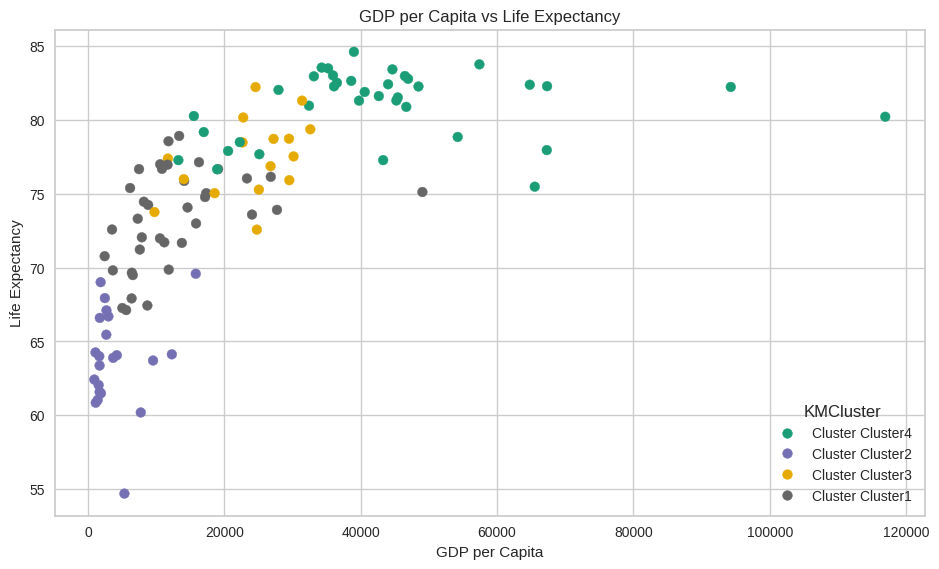

In [35]:
# Define unique cluster values and corresponding labels
unique_clusters = ctrsDF['KMCluster'].unique()
cluster_labels = ['Cluster ' + str(cluster) for cluster in unique_clusters]

# Create scatter plot with color-coded clusters
plt.figure(figsize=(10, 6))
scatter = plt.scatter(ctrsDF['gdp_per_capita'], ctrsDF['life_expectancy'], c=ctrsDF['kmc'], cmap='Dark2')

# Add legend with cluster labels
plt.legend(handles=scatter.legend_elements()[0], labels=cluster_labels, title='KMCluster')

# Set plot labels and title
plt.xlabel('GDP per Capita')
plt.ylabel('Life Expectancy')
plt.title('GDP per Capita vs Life Expectancy')

# Display the plot
plt.show()

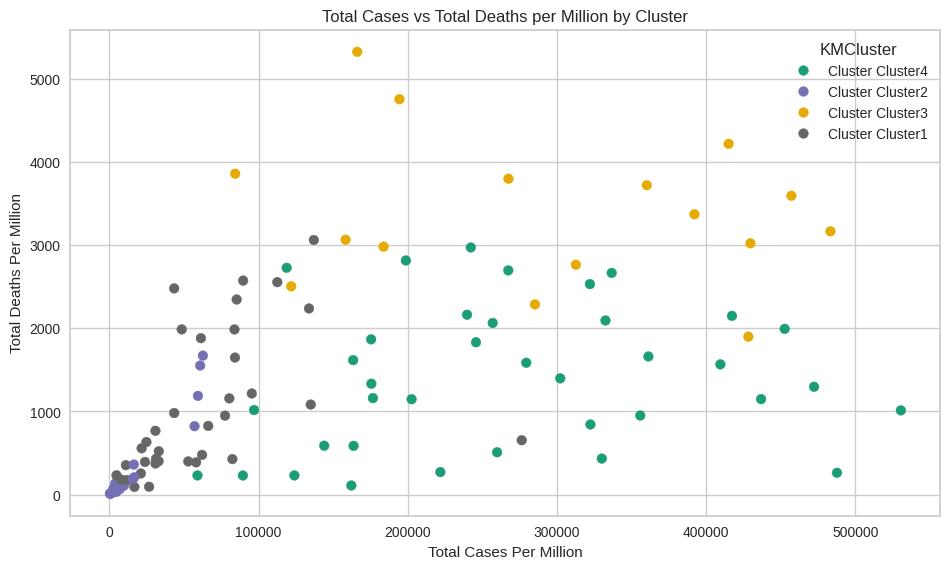

In [36]:
plt.figure(figsize=(10, 6))
plt.scatter(ctrsDF['total_cases_per_million'], ctrsDF['total_deaths_per_million'], c=ctrsDF['kmc'], cmap='Dark2')

# Add legend with cluster labels
plt.legend(handles=scatter.legend_elements()[0], labels=cluster_labels, title='KMCluster')

plt.xlabel('Total Cases Per Million')
plt.ylabel('Total Deaths Per Million')
plt.title('Total Cases vs Total Deaths per Million by Cluster')

plt.show()

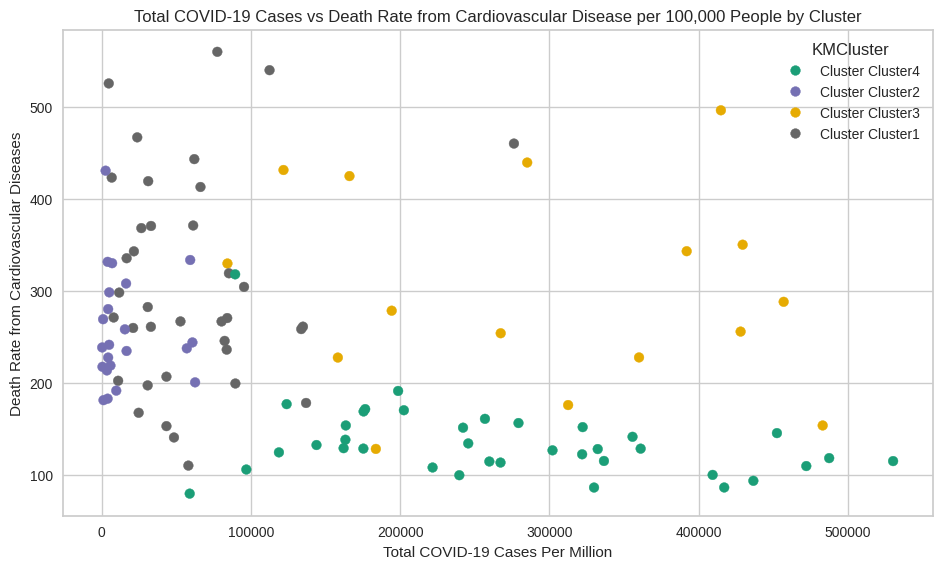

In [37]:
plt.figure(figsize=(10, 6))
plt.scatter(ctrsDF['total_cases_per_million'], ctrsDF['cardiovasc_death_rate'], c=ctrsDF['kmc'], cmap='Dark2')

# Add legend with cluster labels
plt.legend(handles=scatter.legend_elements()[0], labels=cluster_labels, title='KMCluster')

plt.xlabel('Total COVID-19 Cases Per Million')
plt.ylabel('Death Rate from Cardiovascular Diseases')
plt.title('Total COVID-19 Cases vs Death Rate from Cardiovascular Disease per 100,000 People by Cluster')

plt.show()

In [38]:
ctrsDF.to_csv('countriesClusters.csv')

The final results can be visualized in the following dashboard: [Kmeans Analysis Covid-19 Performance](https://public.tableau.com/views/KmeansAnalysisCovid-19Performance/ClusteredCountries?:language=es-ES&:sid=&:redirect=auth&:display_count=n&:origin=viz_share_link)